In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')

In [3]:
del df['User ID']

In [5]:
df = pd.get_dummies(df,drop_first = True)

In [6]:
df.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [9]:
X=df.loc[:,['Age','EstimatedSalary','Gender_Male']]

In [10]:
X

,Age,EstimatedSalary,Gender_Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1
...,...,...,...
395,46,41000,0
396,51,23000,1
397,50,20000,0
398,36,33000,1


In [11]:
Y=df.loc[:,['Purchased']].values

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc=StandardScaler()

In [14]:
x=sc.fit_transform(X)

In [15]:
x

array([[-1.78179743, -1.49004624,  1.02020406],
       [-0.25358736, -1.46068138,  1.02020406],
       [-1.11320552, -0.78528968, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138, -0.98019606],
       [-0.15807423, -1.07893824,  1.02020406],
       [ 1.08359645, -0.99084367, -0.98019606]])

In [16]:
y=Y.reshape(-1)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
#splitting the data into train and test data
X_tr,X_ts,Y_tr,Y_ts= train_test_split(x,Y,random_state=10,test_size=0.2)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [20]:
acc_value=[]
err_value=[]

In [21]:
for k in range(1,30):
    model = KNeighborsClassifier(n_neighbors =k)
    model.fit(X_tr,Y_tr)
    Y_prediction = model.predict(X_ts)
    accuracy = accuracy_score(Y_ts,Y_prediction)
    acc_value.append(accuracy)
    err_value.append(1-accuracy)

C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

In [22]:
import matplotlib.pyplot as plt

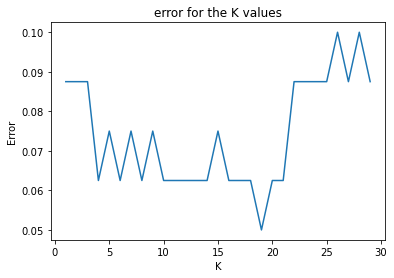

In [23]:
plt.plot(range(1,30),err_value)
plt.title('error for the K values')
plt.xlabel('K')
plt.ylabel('Error')
plt.show()

In [24]:
#importing classification matics
from sklearn.metrics import confusion_matrix

In [25]:
confusion_matrix(Y_ts,Y_prediction)

array([[51,  1],
       [ 6, 22]], dtype=int64)

In [26]:
accuracy_score(Y_ts,Y_prediction)

0.9125

In [27]:
import pickle

In [28]:
file= open('knn.pkl','wb')

In [29]:
pickle.dump(model,file)